In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from lmfit.models import GaussianModel, LorentzianModel, VoigtModel, SkewedVoigtModel, ConstantModel
from lmfit.models import ExponentialGaussianModel, PowerLawModel, StudentsTModel, LinearModel
import sys
sys.path.append("/home/oslick/jupiter")
sys.path.append("/home/oslick/jupiter/12")
import myfunctions8 as mf8
import exp_func
import matplotlib.ticker as tick
import lmfit

In [2]:
size='_q511al_'
en=20
R=exp_func.np_load('../12/fR0'+size+str(en)+'keV.npy')
r_range=np.arange(0,257)/10
r=np.array(r_range[1:-1])

In [24]:
mod3= ConstantModel(prefix='m3_')
params = mod3.guess(R, x=r)


mod2=PowerLawModel(prefix='m2_')
params.update(mod2.make_params())
params['m2_amplitude'].set(value=0., vary=False, expr='')


mod1=SkewedVoigtModel(prefix='m1_')
params.update(mod1.make_params())
params['m1_gamma'].set(value=1., vary=True, expr='')

model = mod1 + mod2 + mod3

# do the fit, print out report with results 
result = model.fit(R, params, x=r)
print(result.fit_report())

[[Model]]
    ((Model(skewed_voigt, prefix='m1_') + Model(powerlaw, prefix='m2_')) + Model(constant, prefix='m3_'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 165
    # data points      = 255
    # variables        = 7
    chi-square         = 3.6098e-09
    reduced chi-square = 1.4556e-11
    Akaike info crit   = -6356.12308
    Bayesian info crit = -6331.33423
##  Warning: uncertainties could not be estimated:
    m2_exponent:   at initial value
[[Variables]]
    m3_c:          6.4004e-05 (init = 0.0009657012)
    m2_amplitude:  0 (fixed)
    m2_exponent:   1.00000000 (init = 1)
    m1_amplitude:  0.03879841 (init = 1)
    m1_center:    -3.44278770 (init = 0)
    m1_sigma:      5.86783318 (init = 1)
    m1_skew:       1.75727998 (init = 0)
    m1_gamma:      2.77830527 (init = 1)


In [25]:
items=result.params.items()
fit={}
for i in items:
    #print(i[1])
    fit[i[1].name]={'value': i[1].value, 'error':i[1].stderr}
print(fit['m1_center'])

{'value': -3.4427876978215024, 'error': None}


In [26]:
V='V = Voigt(r; A, $\mu$, $\sigma$, $\gamma$)'
if fit['m3_c']['error']!=None:
    C='C= '+str(np.round(fit['m3_c']['value'],5))+str('$\pm$')+str(np.round(fit['m3_c']['error'],6))
else:
    C='C= '+str(np.round(fit['m3_c']['value'],5))
C_value=fit['m3_c']['value']
print(C)
if fit['m3_c']['error']!=None:
    A='A= ' + str(np.round(fit['m1_amplitude']['value'],3))+str('$\pm$')+str(np.round(fit['m1_amplitude']['error'],3))
else:
    A='A= ' + str(np.round(fit['m1_amplitude']['value'],3))
print(A)
if fit['m3_c']['error']!=None:
    M='$\mu$= ' +str(np.round(fit['m1_center']['value'],2))+str('$\pm$')+str(np.round(fit['m1_center']['error'],2))
else:
    M='$\mu$= ' +str(np.round(fit['m1_center']['value'],2))
print(M)
if fit['m3_c']['error']!=None:
    S='$\sigma$ = '+str(np.round(fit['m1_sigma']['value'],2))+str('$\pm$')+str(np.round(fit['m1_sigma']['error'],2))
else:
    S='$\sigma$ = '+str(np.round(fit['m1_sigma']['value'],2))
print(S)
if fit['m3_c']['error']!=None:
    G='$\gamma$ = '+str(np.round(fit['m1_gamma']['value'],2))+str('$\pm$')+str(np.round(fit['m1_gamma']['error'],2))
else:
    G='$\gamma$ = '+str(np.round(fit['m1_gamma']['value'],2))
print(G)
if fit['m3_c']['error']!=None:
    Sk='skew = '+str(np.round(fit['m1_skew']['value'],2))+str('$\pm$')+str(np.round(fit['m1_skew']['error'],2))
else:
    Sk='skew = '+str(np.round(fit['m1_skew']['value'],2))
print(Sk)
#if fit['m3_c']['error']!=None:
#    A2='  $A_2$ = '+str(np.round(fit['m2_amplitude']['value'],5))+str('$\pm$')+str(np.round(fit['m2_amplitude']['error'],5))
#else:
#    A2='  $A_2$ = '+str(np.round(fit['m2_amplitude']['value'],5))
#print(A2)
#if fit['m3_c']['error']!=None:
#    k='  k = '+str(np.round(fit['m2_exponent']['value'],2))+str('$\pm$')+str(np.round(fit['m2_exponent']['error'],2))
#else:
#    k='  k = '+str(np.round(fit['m2_exponent']['value'],2))
#print(k)

C= 6e-05
A= 0.039
$\mu$= -3.44
$\sigma$ = 5.87
$\gamma$ = 2.78
skew = 1.76


<IPython.core.display.Javascript object>


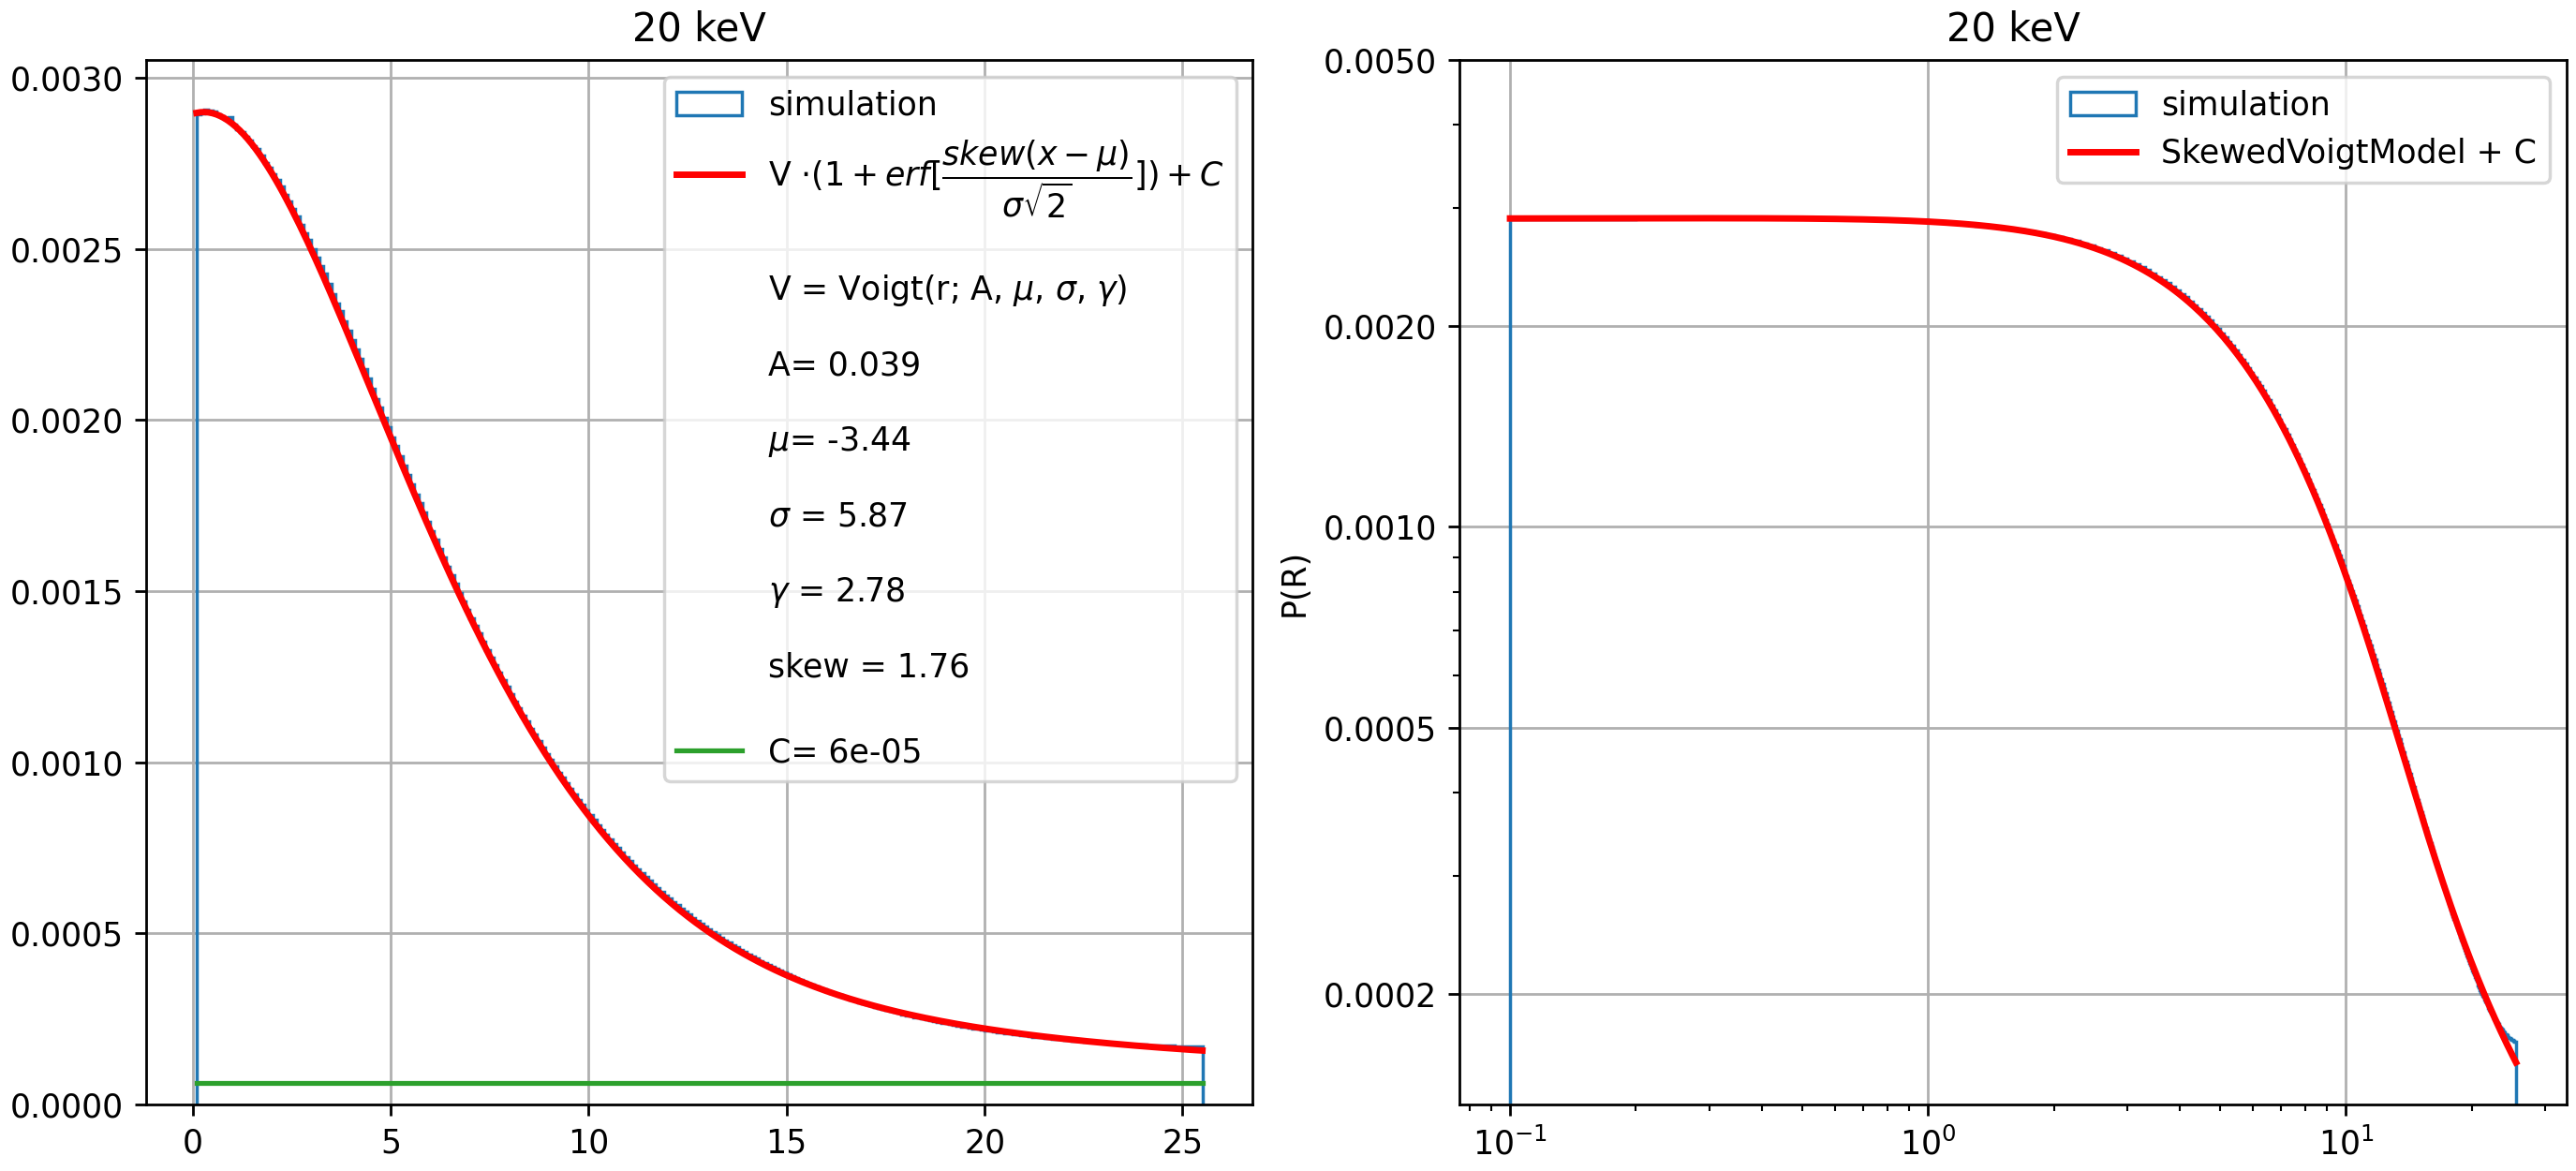

In [27]:
for en in [20]:
    # plot data, best fit, fit interpolated to `xx`
    fig, ax = plt.subplots(1,2, figsize=(11,5), constrained_layout=True)
    ax[0].set_title(str(en)+' keV')
    ax[1].set_title(str(en)+' keV')
    ax[0].hist(r[:-1], r[:], weights=R[:-1], histtype='step', label='simulation')
    label1='V $\cdot (1+erf[\dfrac{skew(x-\mu)}{\sigma\sqrt{2}} ]) + C$'
    label2='\n' + V +'\n\n'+A+'\n \n'+ M+'\n \n'+S+'\n \n'+G+'\n \n'+Sk+'\n'
#    label2='$ $'
    ax[0].plot(r, result.best_fit, color='r', linewidth=2, label=label1)
    ax[0].plot(r,np.zeros(len(r)),alpha=0, label=label2)
    ax[0].plot(r,np.ones(len(r))*C_value, label=C)

    ax[1].set(ylabel='P(R)',yscale='log')
    ax[1].set(xscale='log')
    ax[1].hist(r[:-1], r[:], weights=R[:-1], histtype='step', label='simulation')
    ax[1].plot(r, result.best_fit, color='r', linewidth=2, label='SkewedVoigtModel + C')
    ax[1].get_yaxis().set_major_formatter(tick.ScalarFormatter())
    ax[1].set_yticks([0.0002, 0.0005, 0.001, 0.002, 0.005])
    for i in ax:
        i.grid(True)
        i.legend()
    plt.show()
    plt.savefig('20.pdf', format='pdf')